In [25]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from tqdm import tqdm
from sklearn import metrics
from sklearn.multioutput import MultiOutputClassifier

In [26]:

genre=['thriller','comedy','documentary','drama','horror','short','western','family','sport','romance','war','game-show','biography','adult','talk-show','action','crime','animation','music','reality-tv','adventure','sci-fi']
fallback_genre = 'Unknown'


In [27]:
train_data = pd.read_csv('C:\\Users\\Hari\\Downloads\\archive (2)\\Genre Classification Dataset\\train_data.txt', sep=':::', header=None, names=['ID', 'TITLE', 'GENRE','DESCRIPTION'])
   

C:\Users\Hari\AppData\Local\Temp\ipykernel_21112\1469093451.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  train_data = pd.read_csv('C:\\Users\\Hari\\Downloads\\archive (2)\\Genre Classification Dataset\\train_data.txt', sep=':::', header=None, names=['ID', 'TITLE', 'GENRE','DESCRIPTION'])


In [28]:
print(train_data.head())

   ID                               TITLE       GENRE  \
0   1       Oscar et la dame rose (2009)       drama    
1   2                       Cupid (1997)    thriller    
2   3   Young, Wild and Wonderful (1980)       adult    
3   4              The Secret Sin (1915)       drama    
4   5             The Unrecovered (2007)       drama    

                                         DESCRIPTION  
0   Listening in to a conversation between his do...  
1   A brother and sister with a past incestuous r...  
2   As the bus empties the students for their fie...  
3   To help their unemployed father make ends mee...  
4   The film's title refers not only to the un-re...  


In [29]:
print(train_data.info)

<bound method DataFrame.info of           ID                                         TITLE          GENRE  \
0          1                 Oscar et la dame rose (2009)          drama    
1          2                                 Cupid (1997)       thriller    
2          3             Young, Wild and Wonderful (1980)          adult    
3          4                        The Secret Sin (1915)          drama    
4          5                       The Unrecovered (2007)          drama    
...      ...                                           ...            ...   
54209  54210                              "Bonino" (1953)         comedy    
54210  54211                  Dead Girls Don't Cry (????)         horror    
54211  54212    Ronald Goedemondt: Ze bestaan echt (2008)    documentary    
54212  54213                     Make Your Own Bed (1944)         comedy    
54213  54214   Nature's Fury: Storm of the Century (2006)        history    

                                           

In [30]:
X_train = train_data['TITLE'].astype(str).apply(lambda doc: doc.lower())
genre_labels = [genre.split(', ') for genre in train_data['GENRE']]
mlb = MultiLabelBinarizer()
y_train = mlb.fit_transform(genre_labels)

tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

In [31]:
test_data = pd.read_csv('C:\\Users\\Hari\\Downloads\\archive (2)\\Genre Classification Dataset\\test_data.txt', sep=':::', header=None, names=['ID', 'TITLE','DESCRIPTION'])


X_test = test_data['DESCRIPTION'].astype(str).apply(lambda doc: doc.lower())
X_test_tfidf = tfidf_vectorizer.transform(X_test)

C:\Users\Hari\AppData\Local\Temp\ipykernel_21112\666021068.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  test_data = pd.read_csv('C:\\Users\\Hari\\Downloads\\archive (2)\\Genre Classification Dataset\\test_data.txt', sep=':::', header=None, names=['ID', 'TITLE','DESCRIPTION'])


In [32]:
print(test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54200 entries, 0 to 54199
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           54200 non-null  int64 
 1   TITLE        54200 non-null  object
 2   DESCRIPTION  54200 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.2+ MB
None


In [33]:
print(train_data.describe())

                 ID
count  54214.000000
mean   27107.500000
std    15650.378084
min        1.000000
25%    13554.250000
50%    27107.500000
75%    40660.750000
max    54214.000000


In [34]:
print(test_data.describe)

<bound method NDFrame.describe of           ID                             TITLE  \
0          1             Edgar's Lunch (1998)    
1          2         La guerra de papá (1977)    
2          3      Off the Beaten Track (2010)    
3          4           Meu Amigo Hindu (2015)    
4          5                Er nu zhai (1955)    
...      ...                               ...   
54195  54196   "Tales of Light & Dark" (2013)    
54196  54197      Der letzte Mohikaner (1965)    
54197  54198              Oliver Twink (2007)    
54198  54199                Slipstream (1973)    
54199  54200        Curitiba Zero Grau (2010)    

                                             DESCRIPTION  
0       L.R. Brane loves his life - his car, his apar...  
1       Spain, March 1964: Quico is a very naughty ch...  
2       One year in the life of Albin and his family ...  
3       His father has died, he hasn't spoken with hi...  
4       Before he was known internationally as a mart...  
...        

In [35]:
print(train_data.isnull().sum())

ID             0
TITLE          0
GENRE          0
DESCRIPTION    0
dtype: int64


In [36]:
print(test_data.isnull().sum())

ID             0
TITLE          0
DESCRIPTION    0
dtype: int64


In [37]:
print(train_data.count())

ID             54214
TITLE          54214
GENRE          54214
DESCRIPTION    54214
dtype: int64


In [38]:
print(train_data.shape)
print(test_data.shape)

(54214, 4)
(54200, 3)


<function matplotlib.pyplot.show(close=None, block=None)>

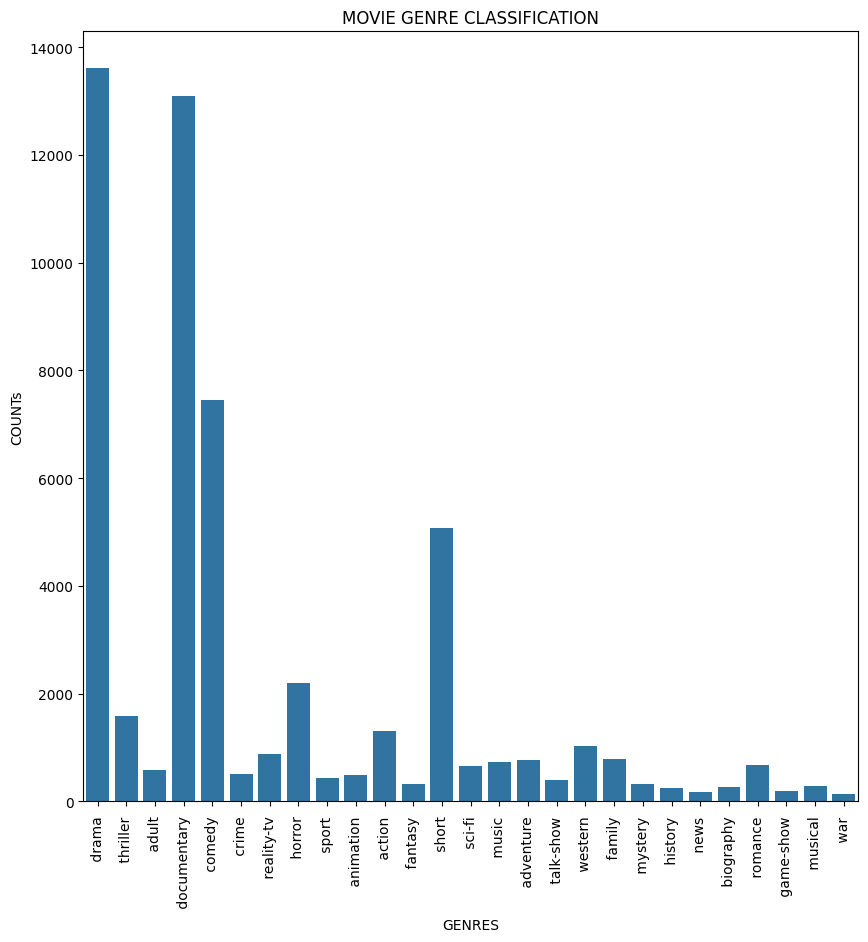

In [39]:
plt.figure(figsize=(10,10))
sn.countplot(x="GENRE",data=train_data)
plt.xlabel('GENRES')
plt.ylabel('COUNTs')
plt.title('MOVIE GENRE CLASSIFICATION')
plt.xticks(rotation=90);
plt.show

In [40]:
model = MultiOutputClassifier(MultinomialNB())
model.fit(X_train_tfidf, y_train)
    

MultiOutputClassifier(estimator=MultinomialNB())

In [41]:
y_pred = model.predict(X_test_tfidf)

In [42]:
predicted_genre = mlb.inverse_transform(y_pred)

test_titles = test_data['TITLE']
test_results = pd.DataFrame({'TITLE': test_titles, 'PREDICTED_GENRE': predicted_genre})

In [43]:
test_data.columns

Index(['ID', 'TITLE', 'DESCRIPTION'], dtype='object')

In [44]:
test_data.head()

,ID,TITLE,DESCRIPTION
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),Before he was known internationally as a mart...


In [45]:

test_results.head()

,TITLE,PREDICTED_GENRE
0,Edgar's Lunch (1998),()
1,La guerra de papá (1977),()
2,Off the Beaten Track (2010),"( documentary ,)"
3,Meu Amigo Hindu (2015),()
4,Er nu zhai (1955),()


In [46]:
test_descriptions = test_data['DESCRIPTION']
test_descriptions = pd.DataFrame({'DESCRIPTION': test_descriptions, 'PREDICTED_GENRE': predicted_genre})

In [47]:
test_descriptions = test_data['DESCRIPTION']
test_descriptions = pd.DataFrame({'DESCRIPTION': test_descriptions, 'PREDICTED_GENRE': predicted_genre})

In [48]:
test_descriptions.head()

,DESCRIPTION,PREDICTED_GENRE
0,"L.R. Brane loves his life - his car, his apar...",()
1,"Spain, March 1964: Quico is a very naughty ch...",()
2,One year in the life of Albin and his family ...,"( documentary ,)"
3,"His father has died, he hasn't spoken with hi...",()
4,Before he was known internationally as a mart...,()
